# Assignment 62: Gaussian elimination

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

plt.style.use('seaborn-whitegrid')

N = 100

random_matrices = [np.random.rand(n, n) for n in range(1, N + 1)]

execution_times = [0]*len(random_matrices)

# 'eliminate' column j of n x n matrix M
def eliminate(M, j, n):
    M_out = M[:,:].copy()
    row = M[j,:]
    for i in range(j + 1, n):
        l = M[i,j]/M[j,j]
        u = l * row
        z = np.zeros([n, n])
        z[i,:] = -u
        M_out = M_out + z
        
    return M_out
        

# repeatedly 'eliminate' columns until matrix
# is in upper triangular form
def upper_triangular(M):
    M_out = M.copy()
    n = M.shape[0]
    for j in range(n - 1):
        M_out = eliminate(M_out, j, n)
        
    return M_out
        
# compute the determinant of a matrix M in 
# upper triangular form
def determinant(M):
    det = 1.0
    n = M.shape[0]
    ut = upper_triangular(M)
    for i in range(n):
        det *= ut[i, i]
        
    return det

execution_times = [0]*len(random_matrices)

for i, M in enumerate(random_matrices):
    ti = time.perf_counter()
    determinant(M)
    tf = time.perf_counter()
    execution_times[i] = tf - ti

x = [n for n in range(1, N + 1)]

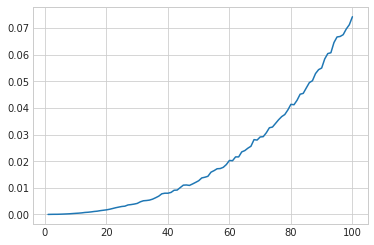

In [2]:
plt.plot(x, execution_times)

The plot above shows that computing the determinant of an upper triangular matrix by multiplying the diagonal elements of said matrix is orders of magntude faster than using the recursive algorithm based on the Laplace expansion, even with the additional overhead from having to put the matrix into upper triangular form. 

To estimate the number of elementary ops required to compute the determinant in the manner above, we first note that 

$$\text{Total ops = ops to put matrix into upper triangular form + ops to compute the determinant} $$

For a matrix of order $n$, it will require a constant number of ops to compute the values $\lambda_{i}$. Each $\lambda_{i}$ multiplies a row with $n$ elements. As there are $n$ rows total, we have order $n^{2}$ total ops. Each resulting row is then subtracted from the corresponding row of the input matrix, which is an order $n$ operation over the entire matrix. Since we have to make repeated passes over the input matrix, the total number of ops to eliminate all of the entries below the diagonal is an additional order $n$ term. This gets us to order $n^{3}$. 

Once we have an equaivalent uper triangular matrix, it's an additional order $n$ multiplications to compute the determinant. 

Thus, we're looking at $\mathcal{O}(n^{3})$ asymptotic running time in the order of the input matrix. This is a polynomial worst-case runtime, and so is a vast improvement over the recursive algorithm, whose exponential runtime implied that it was virtually worthless for all practical purposes. 